# This script is brought to by ROAST Labs the internal development and innovation team at [ROAST](https://weareroast.com/) a digital marketing agency.

**Purpose:**

This Python script interfaces with the AccuRanker API to fetch key phrase and top landing pages. It then check if the top landing page has change for that key phrase.

The output is a cvs where a column flags if the URL has changed. In column I it will flag TRUE when the landing pages ULR has changed from one day to the other.

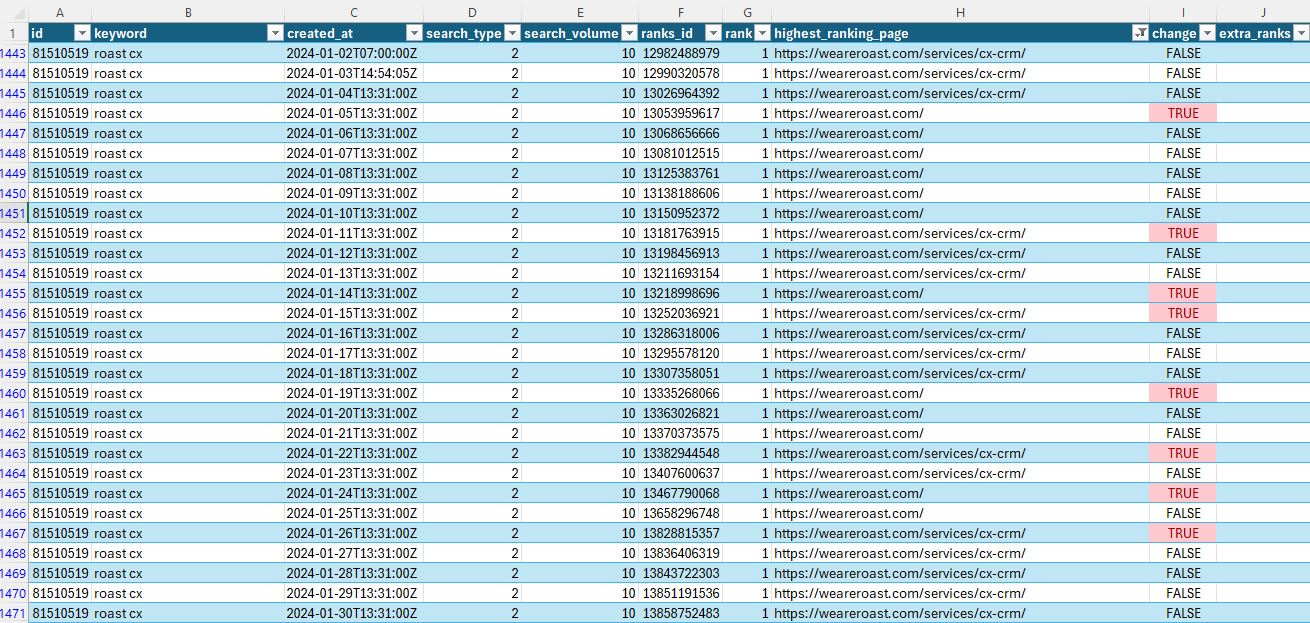

**How to use**

1.   Add in your [Accuranker API key on line 71 in the code below](https://app.accuranker.com/app/api?_gl=1*2h0ngs*_ga*MjAxODIxNjAzOS4xNzE1MDkzNjgx*_ga_D2SXNT78V1*MTcxNTA5MzY4MC4xLjEuMTcxNTA5MzY4Mi41OC4wLjE5NjI4MzIyMjE.#section/Introduction).
2.   Run the code
3.   Select a domain by typing a number from the domains listed
4.   Type in a start date you want the report to run from yyyy-mm-dd
5.   Type in a end date you want the report to run from yyyy-mm-dd
5.   The script will run and then save a csv in the sample_data folder.


Please note you run this script at your own risk, ROAST has no liability for the running of this or any other scripts.

In [1]:
import requests
import csv
from datetime import datetime


def list_accounts(api_key):
    url = "https://app.accuranker.com/api/v4/domains/?fields=domain,display_name,id"
    headers = {
        "Authorization": f"Token {api_key}"
    }
    response = requests.get(url, headers=headers)
    return response.json()

def get_keywords(domain_id, start_date, end_date, api_key):
    url = f"https://app.accuranker.com/api/v4/domains/{domain_id}/keywords/"
    params = {
        "period_from": start_date,
        "period_to": end_date,
        "fields": "id,keyword,search_type,ranks.id,ranks.rank,ranks.highest_ranking_page,ranks.created_at,search_volume.search_volume,extra_ranks"
    }
    headers = {
        "Authorization": f"Token {api_key}"
    }
    full_url = requests.Request('GET', url, headers=headers, params=params).prepare().url
    print("Making API request to:", full_url)
    response = requests.get(full_url, headers=headers)
    return response.json()


def save_to_csv(data):
    timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
    filename = f"/content/sample_data/keywords_ranking_{timestamp}.csv"
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "keyword", "created_at", "search_type", "search_volume", "ranks_id", "rank", "highest_ranking_page", "change", "extra_ranks"])
        for keyword in data:
            ranks = keyword.get('ranks', [])
            search_volume = keyword.get('search_volume', {}).get('search_volume', 'N/A')
            extra_ranks = "; ".join([f"Rank: {er[0]}, URL: {er[1]}" for er in keyword.get('extra_ranks', [])])
            previous_page = None
            for i, rank in enumerate(ranks):
                change = None
                if i == 0:
                    change = None
                else:
                    change = rank['highest_ranking_page'] != previous_page
                previous_page = rank['highest_ranking_page']
                created_at = rank.get('created_at', datetime.now().isoformat())  # Defaulting to current time if not present
                writer.writerow([keyword['id'], keyword['keyword'], created_at, keyword['search_type'], search_volume, rank['id'], rank['rank'], rank['highest_ranking_page'], change, extra_ranks])
    return filename



def main():
    API_KEY = 'insert-your-api-key-here'
    accounts = list_accounts(API_KEY)
    for idx, account in enumerate(accounts):
        print(f"{idx + 1}. {account['display_name']} ({account['domain']})")

    choice = int(input("Select the account number: ")) - 1
    domain_id = accounts[choice]['id']
    start_date = input("Enter start date (YYYY-MM-DD): ")
    end_date = input("Enter end date (YYYY-MM-DD): ")

    keywords_data = get_keywords(domain_id, start_date, end_date, API_KEY)
    csv_file = save_to_csv(keywords_data)
    print(f"Data saved to {csv_file}")

if __name__ == "__main__":
    main()


TypeError: string indices must be integers